In [64]:

#import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn import neighbors, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## DOMAIN: Healthcare

**Import and merge data:**

In [1]:
n= pd.read_csv('Part1 - Normal.csv')
h= pd.read_csv('Part1 - Type_H.csv')
s= pd.read_csv('Part1 - Type_S.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Remove duplicates**

In [2]:
print("Duplicate labels found in dataset:")
print(n.Class.unique(),h.Class.unique(),s.Class.unique())

Duplicate labels found in dataset:
['Normal' 'Nrmal'] ['Type_H' 'type_h'] ['Type_S' 'tp_s']


In [3]:
h['Class'] =h['Class'].str.replace('type_h','Type_H')
n['Class'] =n['Class'].str.replace('Nrmal','Normal')
s['Class'] =s['Class'].str.replace('tp_s','Type_S')
print("Adjusting dataset to have appropriate class:")
print(n.Class.unique(),h.Class.unique(),s.Class.unique())

Adjusting dataset to have appropriate class:
['Normal'] ['Type_H'] ['Type_S']


In [4]:
#reformatting for visualisation
h['Class'] =h['Class'].str.replace('Type_H','Type H')
s['Class'] =s['Class'].str.replace('Type_S','Type S')
print(n.Class.unique(),h.Class.unique(),s.Class.unique())

['Normal'] ['Type H'] ['Type S']


## Creating a function to understand each dataset independently

In [6]:
def cleansing (x):
    
    print("\033[1m HEAD\n\033[0m",x.head())
    print("\033[1m\nTAIL\n\033[0m",x.tail())
    print("\033[1m\nDATA TYPES\n\033[0m",s.dtypes)
    print("\033[1m\nDESCRIBE\n\033[0m",x.describe())
    print("\033[1m\nMissing value is:\033[0m",x.isnull().values.any())
    print("\033[1m\nDupicate value is:\033[0m",x.duplicated().values.any())
    print("\033[1m\nShape of Dataset:\033[0m",x.shape)
    print("\033[1m\nSize of Dataset:\033[0m",x.size)
    print("\033[1m\nDimension of Dataset:\033[0m",x.ndim)  

In [7]:
def correlate(x):
    cl=x.Class.nunique()
    if cl>2:
        cls="Mixed"
    else:
        cls=x.Class[0] 
    print(f"\033[1m\nDiagonal Correlation Heat Map Type: {cls}\033[0m\n")
    corr = x.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    ax = sns.heatmap(
        corr,mask=mask, 
        vmin=-1,vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,linewidths=.5, cbar_kws={"shrink": .5})
   
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right');

In [8]:
def distribution(x):
    cl=x.Class.nunique()
    if cl>2:
        cls="Mixed"
    else:
        cls=x.Class[0]  
    
    print(f"\033[1m\nDistribution Observed In Dataset Type: {cls}\033[0m\n")
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(12,6));
    sns.histplot( x["P_incidence"] , color="skyblue", ax=ax1)
    ax1.set_title("Incidence");
    sns.histplot( x["P_tilt"] , color="dimgray", ax=ax2);
    ax2.set_title("Tilt");
    sns.histplot( x["L_angle"] , color="olive", ax=ax3);
    ax3.set_title("Angle");
    sns.histplot( x["S_slope"] , color="gold", ax=ax4);
    ax4.set_title("Slope");
    sns.histplot( x["P_radius"] , color="teal", ax=ax5);
    ax5.set_title("Radius");
    sns.histplot( x["S_Degree"] , color="seagreen", ax=ax6);
    ax6.set_title("Degree");
    
    plt.tight_layout();

## Analysing Dataset :Type N

In [9]:
cleansing(n)

 HEAD
    P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

TAIL
     P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
95    47.903565  13.616688  36.000000  34.286877  117.449062 -4.245395  Normal
96    53.936748  20.721496  29.220534  33.215251  114.365845 -0.421010  Normal
97    61.446597  22.694968  46.170347  38.751628  125.670725 -2.707880  Normal
98    45.252792   8.693157  41.583126  36.559635  118.545842  0.214750  Normal
99    33.841641   5.073991  36.641233  28.767649  123.945244 -0.199249  Normal

DATA TYPES
 P_incidence    float64
P_tilt  


Distribution Observed In Dataset Type: Normal



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

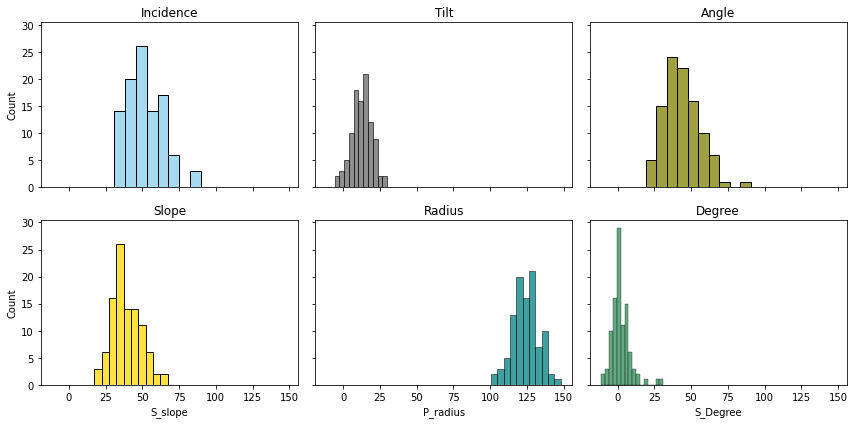

In [10]:
distribution(n)


Diagonal Correlation Heat Map Type: Normal



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

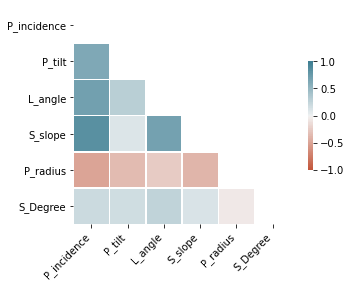

In [11]:
correlate(n)

## Analysing Dataset :Type H

In [12]:
cleansing(h)

 HEAD
    P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027818  22.552586  39.609117  40.475232   98.672917  -0.254400  Type H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type H
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Type H

TAIL
     P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
55    47.657730  13.277385  36.679985  34.380345   98.249781  6.273012  Type H
56    43.349606   7.467469  28.065483  35.882137  112.776187  5.753277  Type H
57    46.855781  15.351514  38.000000  31.504267  116.250917  1.662706  Type H
58    43.203185  19.663146  35.000000  23.540039  124.846109 -2.919076  Type H
59    48.109236  14.930725  35.564683  33.178512  124.056452  7.947905  Type H

DATA TYPES
 P_incidence    float64
P_


Distribution Observed In Dataset Type: Type H



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

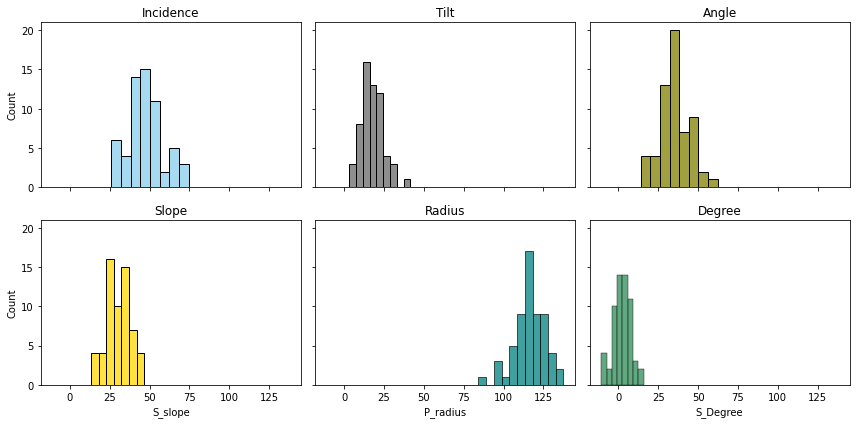

In [13]:
distribution(h)


Diagonal Correlation Heat Map Type: Type H



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

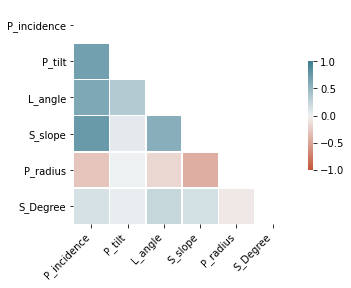

In [14]:
correlate(h)

## Analysing Dataset :Type S

In [15]:
cleansing(s)

 HEAD
    P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    74.377678  32.053104  78.772013  42.324573  143.560690  56.125906  Type S
1    89.680567  32.704435  83.130732  56.976132  129.955476  92.027277  Type S
2    44.529051   9.433234  52.000000  35.095817  134.711772  29.106575  Type S
3    77.690577  21.380645  64.429442  56.309932  114.818751  26.931841  Type S
4    76.147212  21.936186  82.961502  54.211027  123.932010  10.431972  Type S

TAIL
      P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
145    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
146    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
147    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
148    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
149    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

      Class  
145  Type S  
146  Type S  
147  Ty


Distribution Observed In Dataset Type: Type S



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

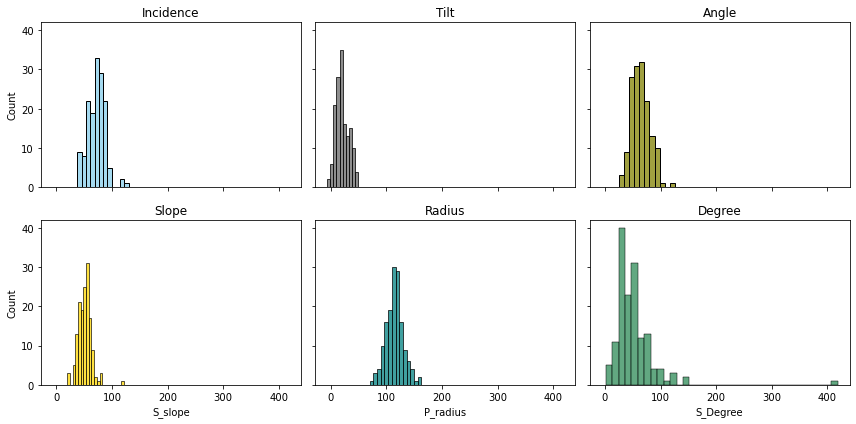

In [17]:
distribution(s)


Diagonal Correlation Heat Map Type: Type S



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

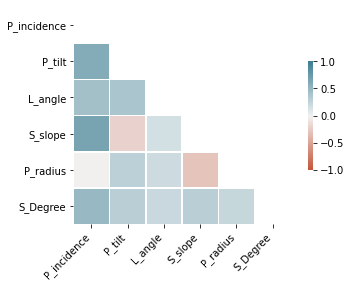

In [18]:
correlate(s)

## Merging All Datasets 

In [19]:
c = pd.concat(([n,h,s]), ignore_index=True)
c

<IPython.core.display.Javascript object>

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type S


**Visually confirming successful combination of all 3 datasets into 1**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

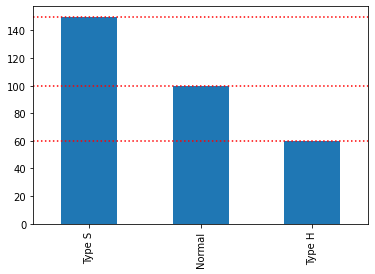

In [21]:
c.Class.value_counts().plot(kind = 'bar');
plt.axhline(y=(n.Class.count()), color='r', linestyle='dotted');
plt.axhline(y=(h.Class.count()), color='r', linestyle='dotted');
plt.axhline(y=(s.Class.count()), color='r', linestyle='dotted');

The number of type s is more than double of type h

## Using the same defined function to analyse and label the new combined data.

In [24]:
cleansing(c)

 HEAD
    P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

TAIL
      P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
305    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
306    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
307    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
308    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
309    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

      Class  
305  Type S  
306  Type S  
307  Type S  

**INFERENCE<br>
-No empty row in dataset from count<br>
-Very high standard deviation fir column S_Degree<br>
-Max value of S_Degree column confirms something unusual which needs to be further checked<br>
-The huge gap between 75% and max value of S_Degree indicates some outliers with unusally high value**


Distribution Observed In Dataset Type: Mixed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

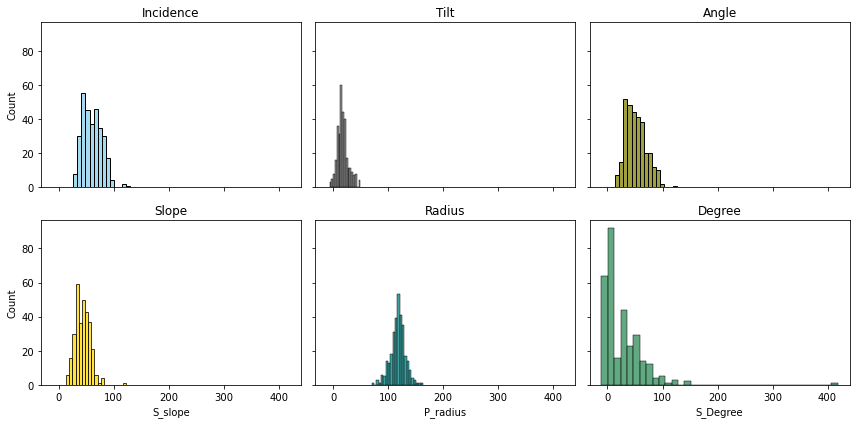

In [25]:
distribution(c)

**Outlier visualised in S_Degree**


Diagonal Correlation Heat Map Type: Mixed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

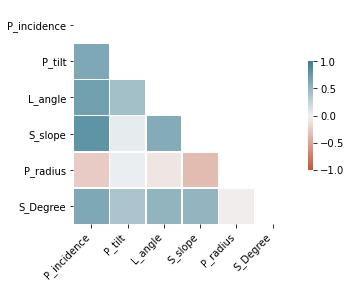

In [26]:
correlate(c)

## Overall co-relation of new combined dataset 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

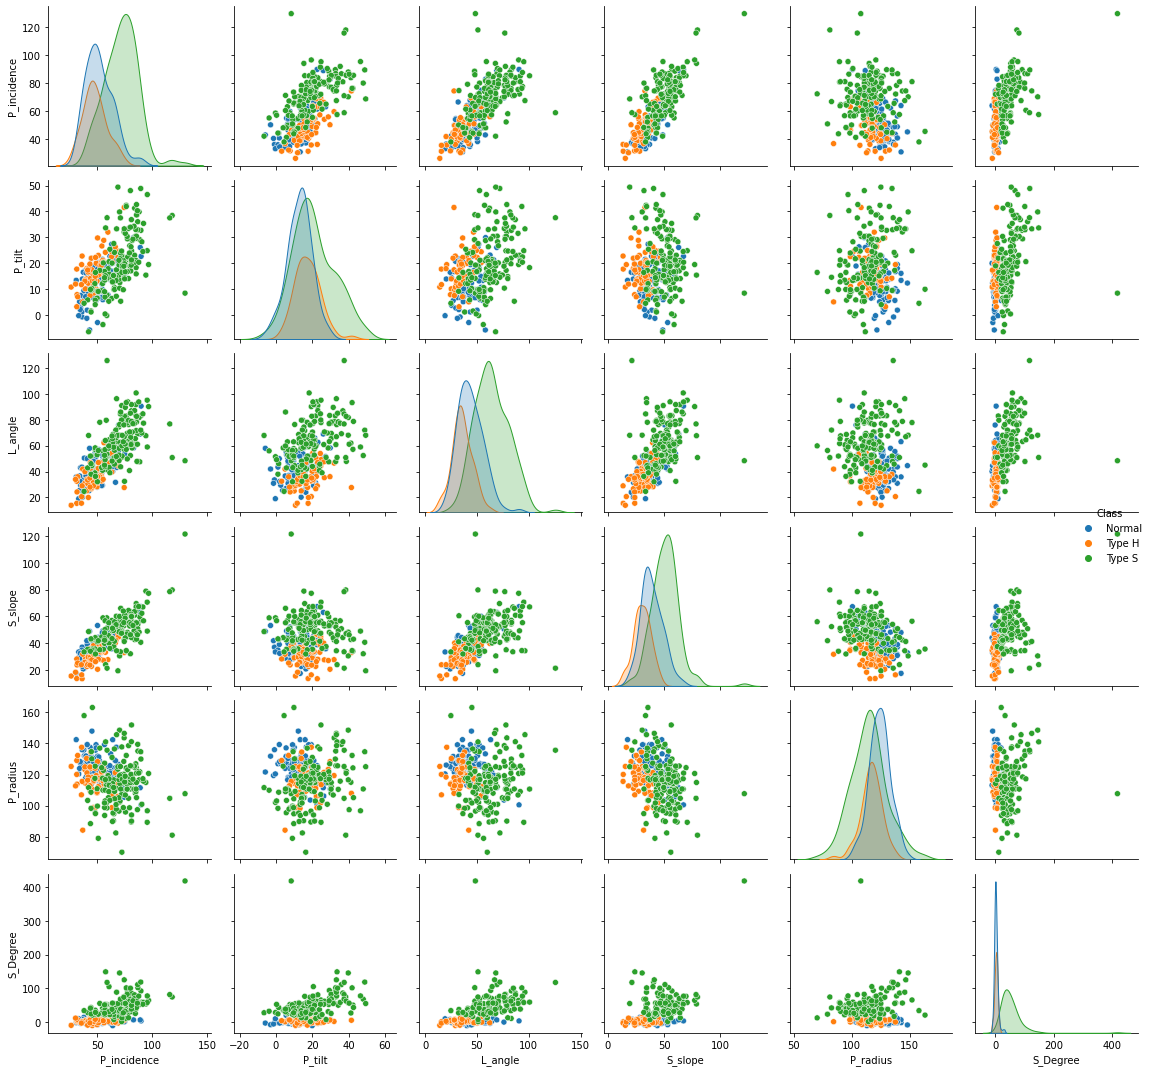

In [27]:
sns.pairplot(c,hue="Class")
plt.tight_layout();

**from pairplot it seems like type h and type s patients are opposite to each other
for example:type h maybe healthy patients and type s maybe sick.....checking hypothesis by comparing distribution of type h and type s**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

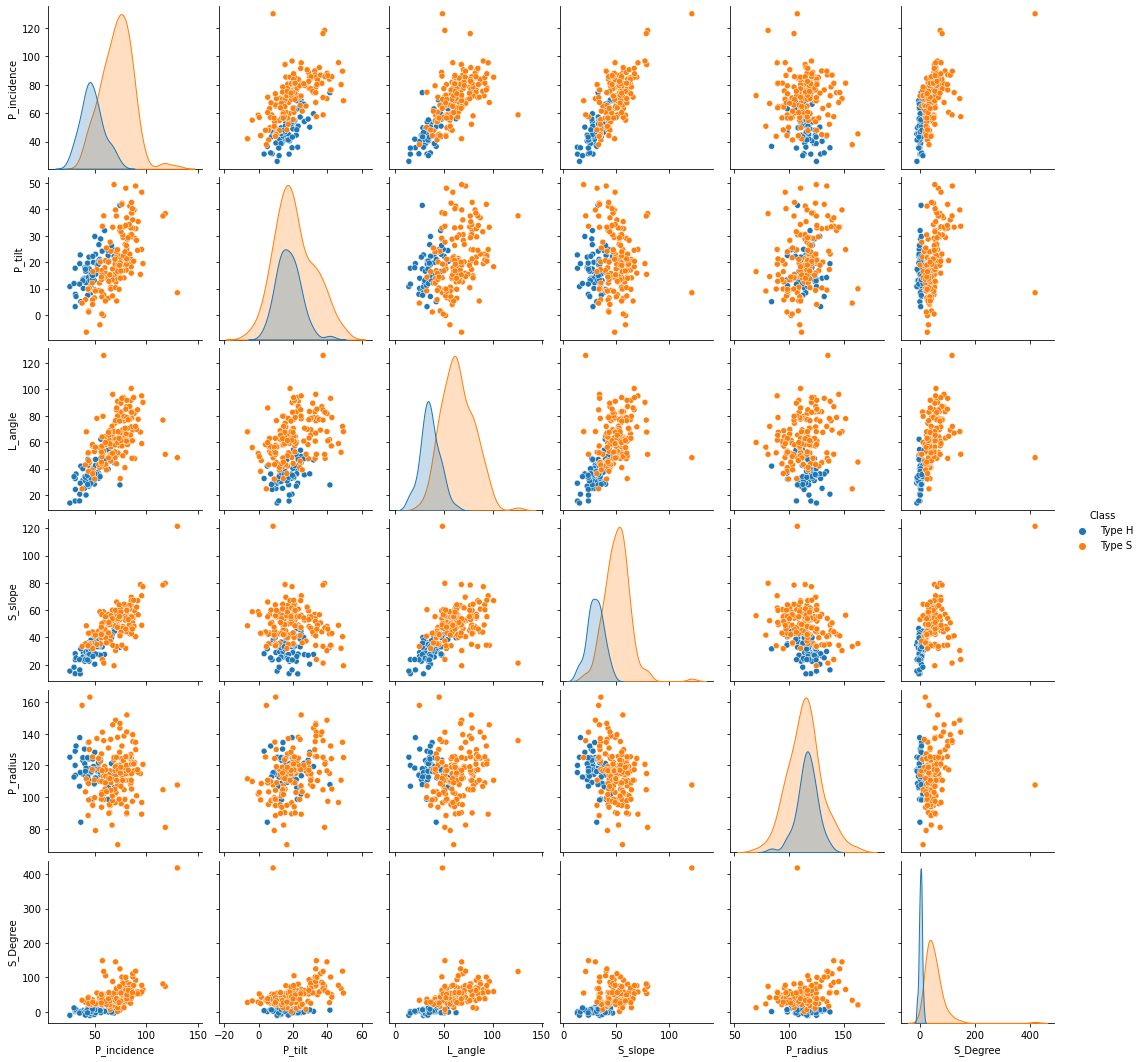

In [29]:
hs = pd.concat(([h,s]), ignore_index=True)
sns.pairplot(hs,hue="Class");

**As we can see most data would be easily classified using this dataset**

<IPython.core.display.Javascript object>

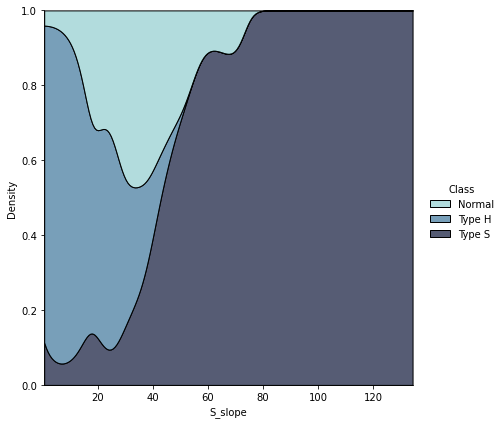

In [30]:
sns.displot(data=c,x="S_slope", hue="Class",kind="kde", height=6,multiple="fill", clip=(0, None),
            palette="ch:rot=-.25,hue=1,light=.75");

**High values of S_slope (Above 80) gets classified as Type S**

<IPython.core.display.Javascript object>

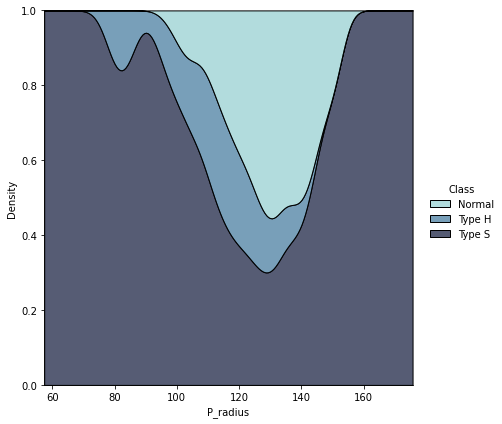

In [31]:
sns.displot(data=c,x="P_radius", hue="Class",kind="kde", height=6,multiple="fill", clip=(0, None),
            palette="ch:rot=-.25,hue=1,light=.75");

<IPython.core.display.Javascript object>

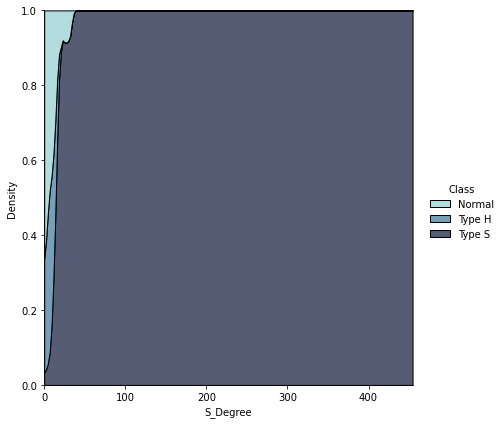

In [32]:
sns.displot(data=c,x="S_Degree", hue="Class",kind="kde", height=6,multiple="fill", clip=(0, None),
            palette="ch:rot=-.25,hue=1,light=.75");

**Outliers might be present here but a direct correlation can be assumed between S_Degree and Type S Classification**

## Identifying outlier

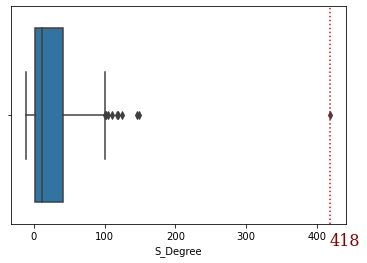

In [37]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16}
sns.boxplot(c["S_Degree"]);
out=int(c["S_Degree"].max())
plt.axvline(x=([c["S_Degree"].max()]), color='r', linestyle='dotted');
plt.text(out,.6, out,fontdict=font );

**Dropping outlier row with very high max value**

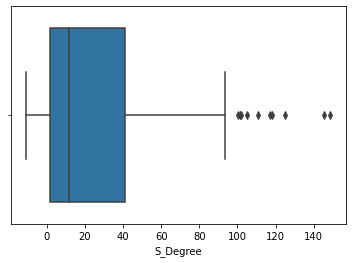

In [39]:
q = c["S_Degree"].max()
c1=c[c["S_Degree"] < q]
sns.boxplot(c1["S_Degree"]);

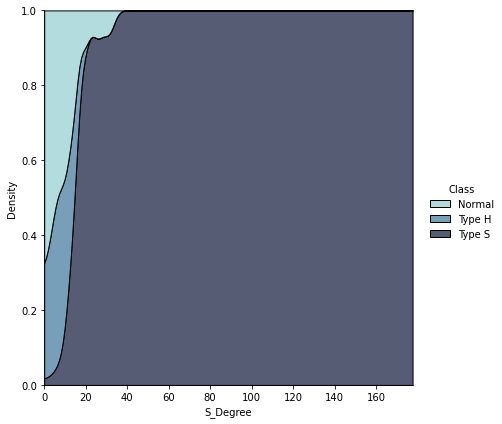

In [40]:
sns.displot(data=c1,x="S_Degree", hue="Class",kind="kde", height=6,multiple="fill", clip=(0, None),
            palette="ch:rot=-.25,hue=1,light=.75");

**INFERENCE<br>
Even after the very high outlier value a direct correlation can be seen between high values of S_Degree and Type S Classification<br>
Confirming the same with bar plot**

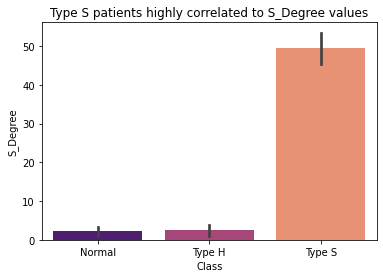

In [41]:
sns.barplot(x='Class', y='S_Degree', data=c1,palette ='magma');
plt.title('Type S patients highly correlated to S_Degree values');


Distribution Observed In Dataset Type: Mixed



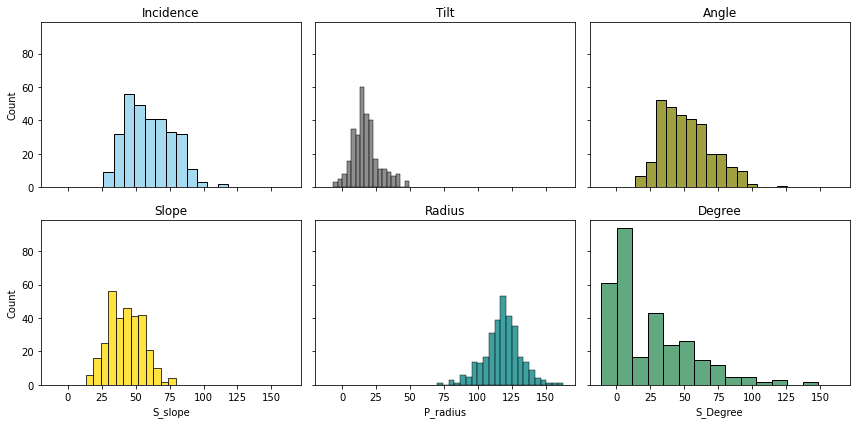

In [42]:
distribution(c1)

## EDA 

**Comparing Type H and Type S as they are visually easier to decipher without the normal classfication<br>
which is always overlapping between these two classifications<br>
For example consider joint plot with combined dataset**

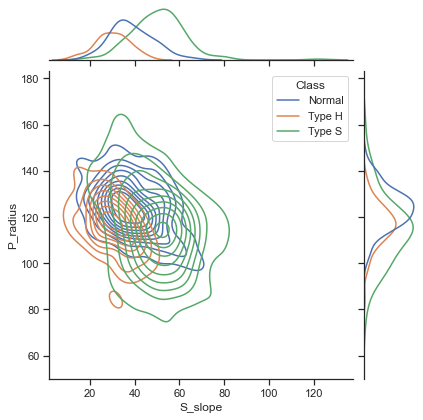

In [44]:
sns.set_theme(style="ticks")
sns.jointplot(data=c,x="S_slope", y="P_radius", hue="Class",kind="kde");

**Same jointplot without the set of people from normal classification**

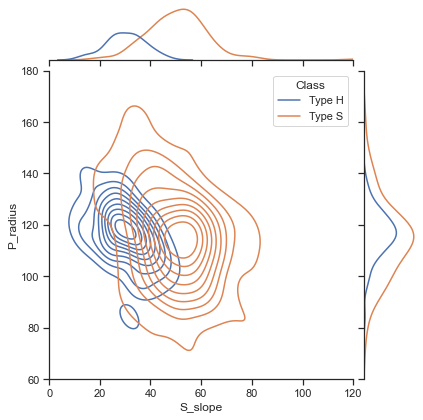

In [46]:
sns.set_theme(style="ticks")
plot=sns.jointplot(data=hs,x="S_slope", y="P_radius", hue="Class",kind="kde");
#setting equal magnitude of x and y to get a 1:1 scaled visualisation
plot.ax_marg_x.set_xlim(0, 120)
plot.ax_marg_y.set_ylim(60, 180);

**INFERENCE<br>
P_ Radius : Beyond a threshold of deviation will get patient classifeid from Type H to Type S<br>
S_Slope is directly prroportional i.e a higher value of S_slope will tend to be classified as Type S**

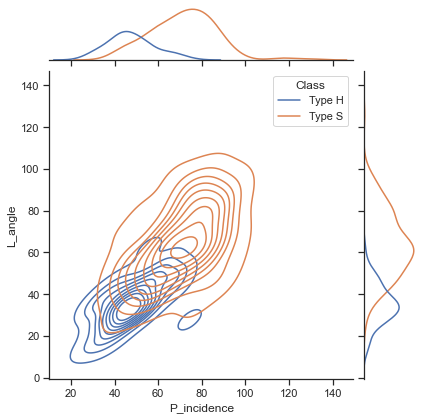

In [48]:
sns.jointplot(data=hs,x="P_incidence", y="L_angle", hue="Class",kind="kde");

**INFERENCE<br>
P_incidence and L_angle have a positive correlation w.r.t each other<br>
If both are low : Type H<br>
If both are high: Type S**

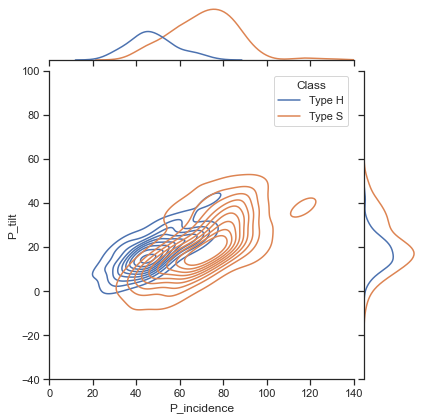

In [50]:
plot=sns.jointplot(data=hs,x="P_incidence", y="P_tilt", hue="Class",kind="kde");
#setting equal magnitude of x and y to get a 1:1 scaled visualisation
plot.ax_marg_x.set_xlim(0, 140);
plot.ax_marg_y.set_ylim(-40,100);

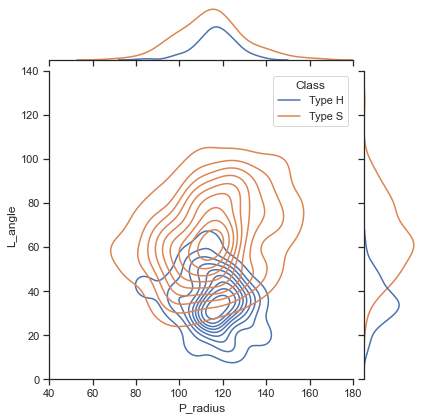

In [52]:
plot=sns.jointplot(data=hs,x="P_radius", y="L_angle", hue="Class",kind="kde");
#setting equal magnitude of x and y to get a 1:1 scaled visualisation
plot.ax_marg_x.set_xlim(40,180 )
plot.ax_marg_y.set_ylim(0, 140);

**INFERENCE<br>
Higher L_angle values tend to be of Type S Classification**

In [54]:
c1.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.659553,0.739510,0.804772,-0.244163,0.642157
P_tilt,0.659553,1.000000,0.432809,0.084618,0.030461,0.534300
L_angle,0.739510,0.432809,1.000000,0.638521,-0.080903,0.672138
S_slope,0.804772,0.084618,0.638521,1.000000,-0.347722,0.429320
P_radius,-0.244163,0.030461,-0.080903,-0.347722,1.000000,-0.000023
S_Degree,0.642157,0.534300,0.672138,0.429320,-0.000023,1.000000


**INFERENCE<br>
-No coorelation between S_Degree and P_radius<br>
-Strong coorealtion between S_slope and P_incidence ~80%<br>
-Similiar strong relation was showed visually earlier between P_incidence and L_angle of ~74%**

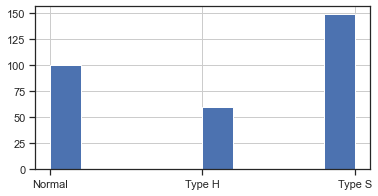

In [57]:
plt.figure(figsize=(6,3))
c1.Class.hist();

**There is a slight class imbalance which we may need to resolve if it affects our prediction.<br>
For now have made stratify=y in train_test_split so that the model can try to accurately map the classification**

## Model training, testing and tuning

In [89]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(c1.drop(["Class"],axis = 1),),
        columns=['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius','S_Degree'])
y = c1.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [90]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(X_train, y_train,)

In [91]:
y_true, y_pred = y_test, knn_model.predict(X_test)
print('k-NN score for training set: %f' % knn_model.score(X_train, y_train))
print('k-NN score for test set: %f' % knn_model.score(X_test, y_test))
print(classification_report(y_true, y_pred))

k-NN score for training set: 0.927126
k-NN score for test set: 0.709677
              precision    recall  f1-score   support

      Normal       0.60      0.75      0.67        20
      Type H       0.36      0.33      0.35        12
      Type S       0.96      0.83      0.89        30

    accuracy                           0.71        62
   macro avg       0.64      0.64      0.64        62
weighted avg       0.73      0.71      0.71        62



Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. High precision relates to the low false positive rate. Our precision per class is varying due to imbalance in dataset.A weighted average gives a better overall reading, BUt since it is a medical dataset we would like this to go up.

Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. For a healthcare dataset its is essential that recall is prioritised and we can get as high a value for recall as possible.

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. F1 is usually more useful than accuracy, especially in an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall


## Find optimal value of k

In [92]:
# creating odd list of K for KNN
myList = list(range(3,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)
              
# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 9


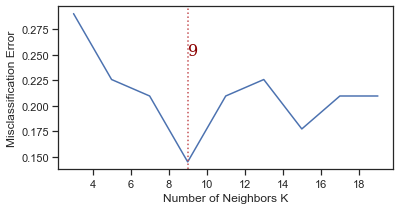

In [93]:
## plot misclassification error vs k
plt.figure(figsize=(6,3))
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.axvline(x=(optimal_k), color='r', linestyle='dotted');
plt.text(optimal_k,.25, optimal_k,fontdict=font );

## Using best value for k in model

In [94]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model = knn.fit(X_train, y_train,)
print('k-NN score for training set: %f' % knn_model.score(X_train, y_train))
print('k-NN score for test set: %f' % knn_model.score(X_test, y_test))
print(classification_report(y_true, y_pred))

k-NN score for training set: 0.821862
k-NN score for test set: 0.854839
              precision    recall  f1-score   support

      Normal       0.67      0.90      0.77        20
      Type H       0.57      0.33      0.42        12
      Type S       0.96      0.90      0.93        30

    accuracy                           0.79        62
   macro avg       0.73      0.71      0.71        62
weighted avg       0.79      0.79      0.78        62



**Using best k value has made a significant change.<br>
Model is predicting better, it is no longer overfitting.Infact test scores are now higher that training scores.<br>
Weighted average scores for precision and recall has increased to almost 80 percent.<br>
But,our individual classes are imbalanced, lets check if blancing input deatures will help in getting higher accuracy**

## Using SMOTE to adjust the class imbalance

In [96]:
oversample = SMOTE()
Xs_train,ys_train = oversample.fit_resample(X_train, y_train)

In [97]:
Xs_test,ys_test = oversample.fit_resample(X_test, y_test)

In [98]:
counter = Counter(ys_train)
print(counter)

Counter({'Type S': 119, 'Normal': 119, 'Type H': 119})


In [102]:
# creating odd list of K for KNN
myList = list(range(3,25))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xs_train, ys_train)
    # predict the response
    ys_pred = knn.predict(Xs_test)
    # evaluate accuracy
    scores = accuracy_score(ys_test, ys_pred)
    ac_scores.append(scores)
              
# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_ks = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_ks)

The optimal number of neighbors is 19


In [103]:
knn = KNeighborsClassifier(n_neighbors=optimal_ks)
smote_model=knn.fit(Xs_train, ys_train)

ys_true, ys_pred = ys_test, knn_model.predict(Xs_test)
print('k-NN score for training set: %f' % smote_model.score(Xs_train, ys_train))
print('k-NN score for test set: %f' % smote_model.score(Xs_test, ys_test))
print(classification_report(ys_true, ys_pred))

k-NN score for training set: 0.826331
k-NN score for test set: 0.844444
              precision    recall  f1-score   support

      Normal       0.63      0.90      0.74        30
      Type H       0.79      0.50      0.61        30
      Type S       0.96      0.90      0.93        30

    accuracy                           0.77        90
   macro avg       0.79      0.77      0.76        90
weighted avg       0.79      0.77      0.76        90



**Precision for classifying minor classes have slightly increased but the F1 scores have reduced.<br>
While a higher precision/recall is assumed to be a better way to judge this model, this cannot necessarily come at the expense of lower accuracy.**

In [104]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))


Best Score:0.8124801692226334
Best Parameters: {'n_neighbors': 5}


Gridsearch also does not help refining result, so we will follow the model using best n value

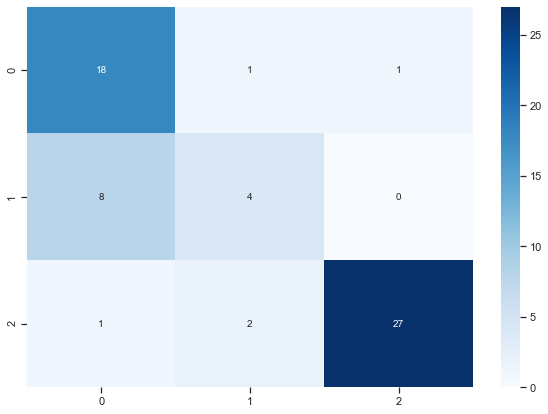

In [105]:
# Display confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

**Conclusion**

While the true positive rate and true negative rate is good there are quite a few misclassification for minority data.<br>
As we saw from bivariate and multivariate analysis differentiating between 'Type H' and 'Type S' is easier from the data availabe.<br>
To Classify Type N accurately in between the other 2 conditions we will need better features which associate with the class.<br>
Knn might not be the best approach maybe taking data to a different dimension like svm will be useful to cluster better.
